In [1]:
import numpy as np
import pandas as pd
import os
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import GRU
import seaborn as sns
import tensorflow as tf

%matplotlib inline

In [2]:
df = pd.read_csv('daily-min-temperatures.csv')

In [3]:
df.head()

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3650 non-null   object 
 1   Temp    3650 non-null   float64
dtypes: float64(1), object(1)
memory usage: 57.2+ KB


In [5]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


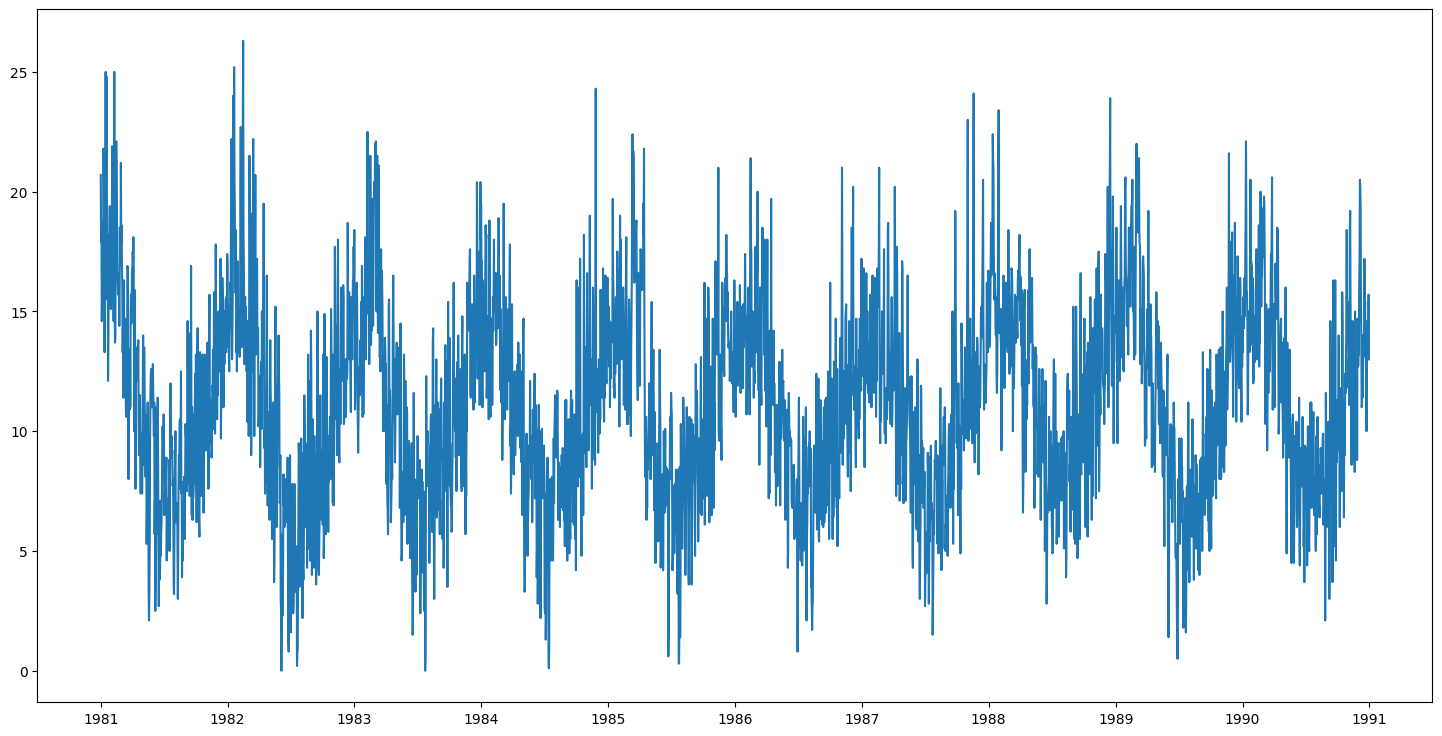

In [6]:
plt.figure(figsize=(18,9))
plt.plot(df.index, df["Temp"], linestyle="-")
plt.xlabel=('Date')
plt.ylabel=('Temp')
plt.show();

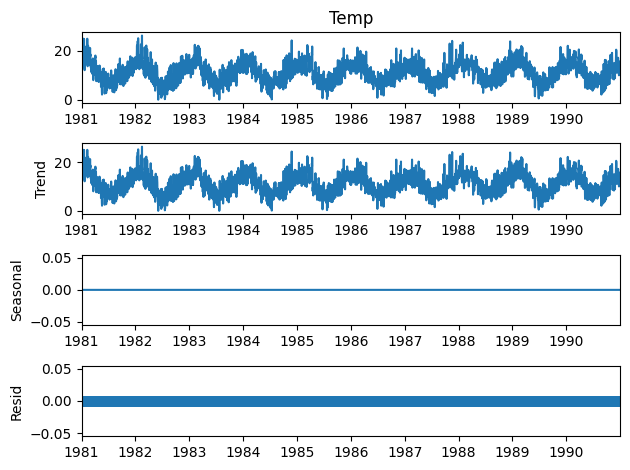

In [7]:
a = seasonal_decompose(df["Temp"], model = "add", period=1)
a.plot();

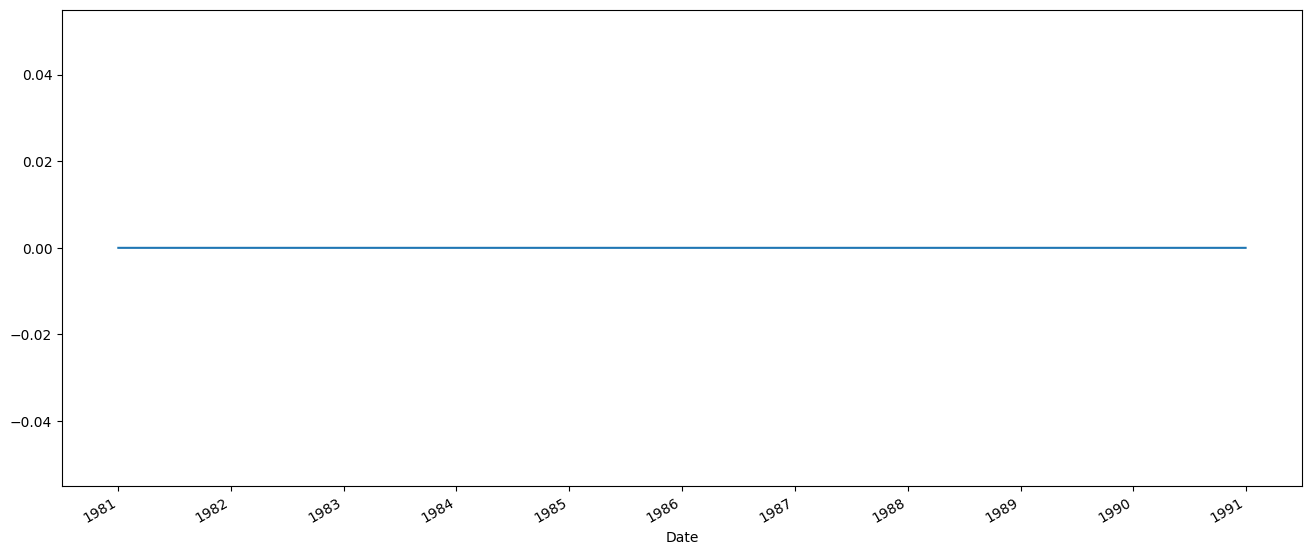

In [8]:
plt.figure(figsize = (16,7))
a.seasonal.plot();

In [9]:
adf_test = adfuller(df["Temp"])
print('p-value = ' + str(adf_test[1]))

if adf_test[1] > 0.05:
    print('it is not a stationary process')
else:
    print('it is a stationary process')

p-value = 0.0002470826300360931
it is a stationary process


In [10]:
test_data_size = 30
train_data = df[:len(df)-test_data_size]
print(train_data)
test_data = df[len(df)-test_data_size:]

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8
...          ...
1990-11-27   8.8
1990-11-28  14.7
1990-11-29  14.7
1990-11-30  12.7
1990-12-01  13.3

[3620 rows x 1 columns]


In [11]:
arima_model = SARIMAX(train_data['Temp'], order = (2,1,1), seasonal_order = (4,0,3,12))
arima_result = arima_model.fit()
arima_result.summary()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31981D+00    |proj g|=  9.74276D-02

At iterate    5    f=  2.30380D+00    |proj g|=  2.11547D-02

At iterate   10    f=  2.29831D+00    |proj g|=  1.46729D-03

At iterate   15    f=  2.29831D+00    |proj g|=  1.03175D-04

At iterate   20    f=  2.29831D+00    |proj g|=  1.57546D-03

At iterate   25    f=  2.29829D+00    |proj g|=  2.16837D-04

At iterate   30    f=  2.29829D+00    |proj g|=  3.39415D-04

At iterate   35    f=  2.29829D+00    |proj g|=  4.68977D-04

At iterate   40    f=  2.29808D+00    |proj g|=  1.22847D-02

At iterate   45    f=  2.29749D+00    |proj g|=  9.97059D-03

At iterate   50    f=  2.29707D+00    |proj g|=  4.13106D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                                       Temp   No. Observations:                 3620
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -8315.409
Date:                                    Wed, 17 May 2023   AIC                          16652.818
Time:                                            21:20:48   BIC                          16720.951
Sample:                                                 0   HQIC                         16677.092
                                                   - 3620                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4993      0.017     28.589      0.000       0.465       0.534
ar.L2         -0.1277      0.018     -7.231      0.000      -0.162      -0.093
ma.L1         -0.9065      0.009    -95.438      0.000      -0.925      -0.888
ar.S.L12       0.7595      0.236      3.217      0.001       0.297       1.222
ar.S.L24       0.5792      0.393      1.475      0.140      -0.191       1.349
ar.S.L36      -0.8599      0.233     -3.695      0.000      -1.316      -0.404
ar.S.L48      -0.0041      0.019     -0.215      0.830      -0.042       0.033
ma.S.L12      -0.7645      0.236     -3.246      0.001      -1.226      -0.303
ma.S.L24      -0.5782      0.388     -1.491      0.136      -1.338       0.182
ma.S.L36       0.8783      0.224      3.919      0.000       0.439       1.318
sigma2         5.8020      0.130     44.676      0.000       5.548       6.057
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                13.99
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred.index = test_data.index
arima_pred

Date
1990-12-02    13.000717
1990-12-03    12.739499
1990-12-04    12.641442
1990-12-05    12.633012
1990-12-06    12.518523
1990-12-07    12.357881
1990-12-08    12.553818
1990-12-09    12.577767
1990-12-10    12.496537
1990-12-11    12.375873
1990-12-12    12.368367
1990-12-13    12.631985
1990-12-14    12.780909
1990-12-15    12.583962
1990-12-16    12.467103
1990-12-17    12.536694
1990-12-18    12.525969
1990-12-19    12.418185
1990-12-20    12.607433
1990-12-21    12.565063
1990-12-22    12.538380
1990-12-23    12.449140
1990-12-24    12.460486
1990-12-25    12.625663
1990-12-26    12.728772
1990-12-27    12.618870
1990-12-28    12.520292
1990-12-29    12.516274
1990-12-30    12.496250
1990-12-31    12.544077
Name: ARIMA Predictions, dtype: float64

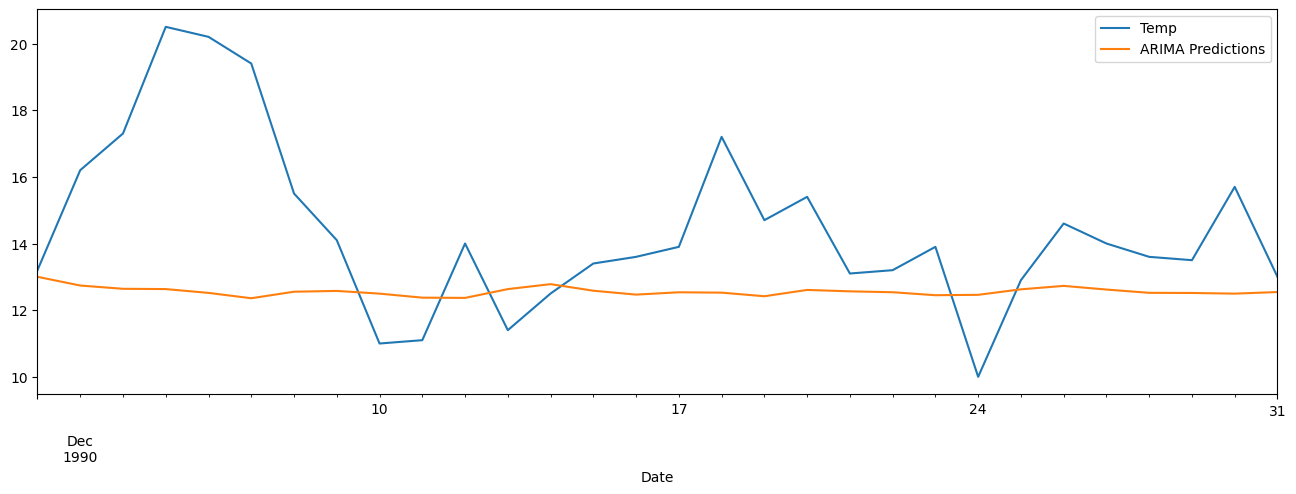

In [13]:
test_data['Temp'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [14]:
arima_rmse_error = rmse(test_data['Temp'], arima_pred)
arima_mse_error = arima_rmse_error**2
arima_mae_error = mean_absolute_error(test_data['Temp'], arima_pred)
mean_value = df['Temp'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 9.631957529042007
RMSE Error: 3.1035395162688046
Mean: 11.177753424657535


In [15]:
global_test_data = test_data.copy()
global_test_data['ARIMA_Predictions'] = arima_pred

In [16]:
scaler = MinMaxScaler()

scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [17]:
n_input = 92
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

In [18]:
#rnn_model = Sequential()
#rnn_model.add(rnn(100, activation='relu', input_shape=(n_input, n_features)))
#rnn_model.add(Dense(1))

'''
rnn_model = tf.keras.Sequential([
    tf.keras.Input(shape=(n_input, n_features)),
    tf.keras.layers.SimpleRNN(64, return_sequences=True, activation='relu'),
    tf.keras.layers.SimpleRNN(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
'''

rnn_model = tf.keras.Sequential([
    #tf.keras.Input(shape=(n_input, n_features)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3,
                           strides=1, padding="causal",
                           activation="relu",
                           input_shape=[n_input, n_features]),
    tf.keras.layers.LSTM(120, return_sequences=True),
    tf.keras.layers.LSTM(80),
    tf.keras.layers.Dense(80, activation='relu'),
    tf.keras.layers.Dense(1)
])

rnn_model.compile(optimizer='adam', loss='mse')

rnn_model.summary()

2023-05-17 21:20:49.287978: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 21:20:49.351345: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 21:20:49.351711: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 21:20:49.352786: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 92, 128)           512       
                                                                 
 lstm (LSTM)                 (None, 92, 120)           119520    
                                                                 
 lstm_1 (LSTM)               (None, 80)                64320     
                                                                 
 dense (Dense)               (None, 80)                6480      
                                                                 
 dense_1 (Dense)             (None, 1)                 81        
                                                                 
Total params: 190,913
Trainable params: 190,913
Non-trainable params: 0
_________________________________________________________________


In [19]:
rnn_model.fit_generator(generator, epochs=15)

Epoch 1/15


2023-05-17 21:20:52.977571: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


3528/3528 [==============================] - 59s 16ms/step - loss: 0.0118
Epoch 2/15
3528/3528 [==============================] - 55s 16ms/step - loss: 0.0097
Epoch 3/15
3528/3528 [==============================] - 54s 15ms/step - loss: 0.0096
Epoch 4/15
3528/3528 [==============================] - 55s 16ms/step - loss: 0.0093
Epoch 5/15
3528/3528 [==============================] - 55s 16ms/step - loss: 0.0092
Epoch 6/15
3528/3528 [==============================] - 55s 16ms/step - loss: 0.0092
Epoch 7/15
3528/3528 [==============================] - 55s 16ms/step - loss: 0.0090
Epoch 8/15
3528/3528 [==============================] - 55s 16ms/step - loss: 0.0090
Epoch 9/15
3528/3528 [==============================] - 56s 16ms/step - loss: 0.0088
Epoch 10/15
3528/3528 [==============================] - 56s 16ms/step - loss: 0.0088
Epoch 11/15
3528/3528 [==============================] - 56s 16ms/step - loss: 0.0088
Epoch 12/15
3528/3528 [==============================] - 56s 16ms/step - l

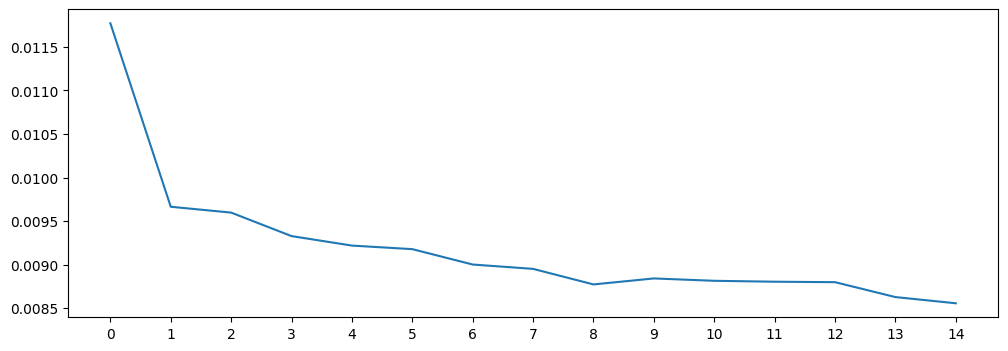

In [20]:
losses_rnn = rnn_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_rnn)),losses_rnn);

In [21]:
RNN_Predictions_scaled = list()

# last n_input elements
batch = scaled_train_data[-n_input:]
print('batch')
print(batch)
print('shape is ', batch.shape)
# shape now is (1, 12, 1)
current_batch = batch.reshape((1, n_input, n_features))
print('current batch')
print(current_batch)
print('shape is ', current_batch.shape)
for i in range(len(test_data)):   
    rnn_pred = rnn_model.predict(current_batch)[0]
    RNN_Predictions_scaled.append(rnn_pred) 
    # first element in current_batch will be gone
    # a new element will be inserted at the end
    current_batch = np.append(current_batch[:,1:,:],[[rnn_pred]],axis=1)
    print('current_batch now\n', current_batch)
    print('current_batch shape\n', current_batch.shape)

batch
[[0.22813688]
 [0.36121673]
 [0.3269962 ]
 [0.28897338]
 [0.39543726]
 [0.39163498]
 [0.2851711 ]
 [0.11406844]
 [0.20152091]
 [0.39923954]
 [0.55513308]
 [0.47908745]
 [0.37262357]
 [0.27376426]
 [0.38403042]
 [0.39543726]
 [0.14068441]
 [0.27756654]
 [0.44106464]
 [0.61977186]
 [0.36501901]
 [0.25855513]
 [0.19771863]
 [0.40304183]
 [0.61977186]
 [0.37262357]
 [0.17490494]
 [0.42205323]
 [0.33079848]
 [0.38022814]
 [0.42965779]
 [0.39923954]
 [0.37642586]
 [0.41825095]
 [0.53231939]
 [0.34980989]
 [0.37262357]
 [0.22813688]
 [0.37262357]
 [0.34980989]
 [0.4486692 ]
 [0.39163498]
 [0.2851711 ]
 [0.29277567]
 [0.60076046]
 [0.55513308]
 [0.39923954]
 [0.42965779]
 [0.41444867]
 [0.24334601]
 [0.41444867]
 [0.34220532]
 [0.41444867]
 [0.47148289]
 [0.44106464]
 [0.50570342]
 [0.54752852]
 [0.69961977]
 [0.51711027]
 [0.56653992]
 [0.56273764]
 [0.58555133]
 [0.4486692 ]
 [0.49429658]
 [0.42205323]
 [0.47528517]
 [0.69581749]
 [0.73003802]
 [0.58555133]
 [0.49809886]
 [0.43726236]


In [22]:
RNN_Predictions_scaled

[array([0.48720926], dtype=float32),
 array([0.48697078], dtype=float32),
 array([0.48470247], dtype=float32),
 array([0.48645997], dtype=float32),
 array([0.4876418], dtype=float32),
 array([0.4884513], dtype=float32),
 array([0.48871434], dtype=float32),
 array([0.4888869], dtype=float32),
 array([0.48911572], dtype=float32),
 array([0.48941988], dtype=float32),
 array([0.48973525], dtype=float32),
 array([0.4900207], dtype=float32),
 array([0.49026757], dtype=float32),
 array([0.49048615], dtype=float32),
 array([0.4906869], dtype=float32),
 array([0.4908744], dtype=float32),
 array([0.4910488], dtype=float32),
 array([0.49120957], dtype=float32),
 array([0.49135673], dtype=float32),
 array([0.49149138], dtype=float32),
 array([0.4916147], dtype=float32),
 array([0.49172783], dtype=float32),
 array([0.49183166], dtype=float32),
 array([0.4919269], dtype=float32),
 array([0.49201417], dtype=float32),
 array([0.4920941], dtype=float32),
 array([0.4921673], dtype=float32),
 array([0.49

In [23]:
RNN_Predictions = scaler.inverse_transform(RNN_Predictions_scaled)

In [24]:
global_test_data['RNN_Predictions'] = RNN_Predictions

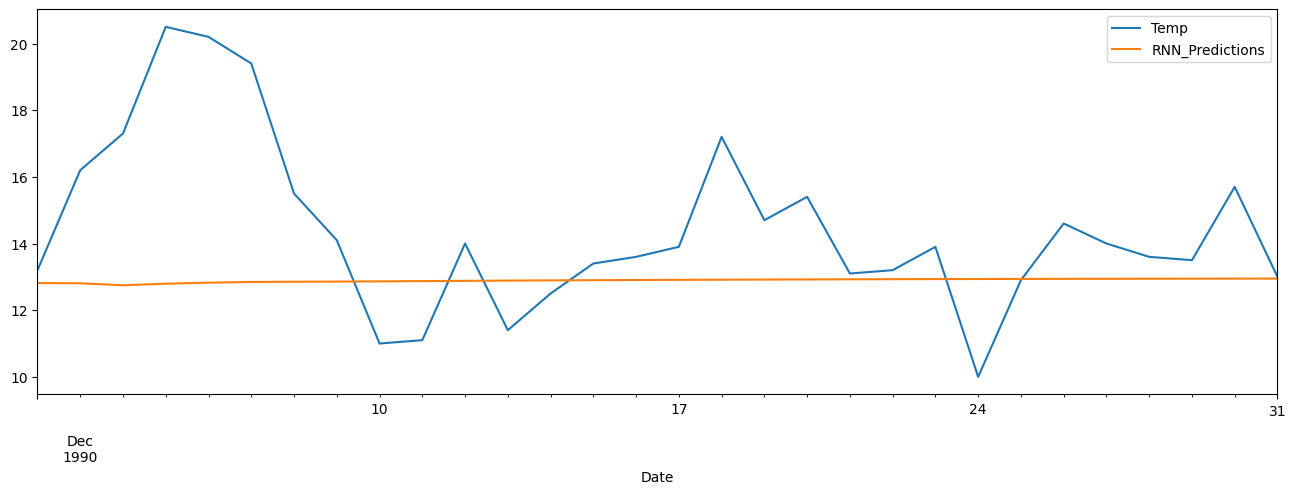

In [25]:
global_test_data['Temp'].plot(figsize = (16,5), legend=True)
global_test_data['RNN_Predictions'].plot(legend = True);

In [26]:
rnn_rmse_error = rmse(global_test_data['Temp'], global_test_data["RNN_Predictions"])
rnn_mse_error = rnn_rmse_error**2
rnn_mae_error = mean_absolute_error(global_test_data['Temp'], global_test_data["RNN_Predictions"])
mean_value = df['Temp'].mean()

print(f'MSE Error: {rnn_mse_error}\nRMSE Error: {rnn_rmse_error}\nMean: {mean_value}')

MSE Error: 8.637642529242619
RMSE Error: 2.9389866500619934
Mean: 11.177753424657535


In [27]:
rmse_errors = [arima_rmse_error, rnn_rmse_error]
mse_errors = [arima_mse_error, rnn_mse_error]
mae_errors = [arima_mae_error, rnn_mae_error]

In [28]:
errors = pd.DataFrame({"Models" : ["ARIMA", "RNN"], "RMSE Error" : rmse_errors, "MSE Error" : mse_errors, "MAE Error": mae_errors})

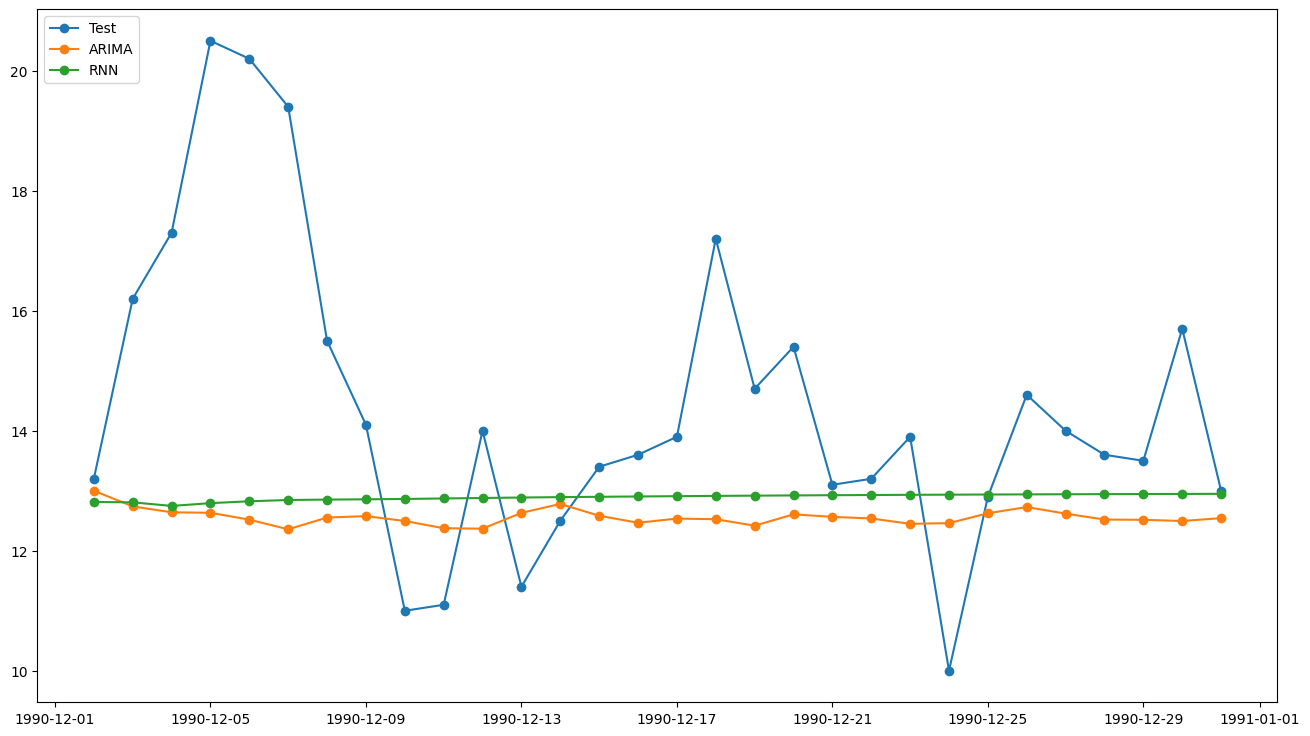

In [29]:
plt.figure(figsize=(16,9))
plt.plot_date(global_test_data.index, global_test_data["Temp"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["ARIMA_Predictions"], linestyle="-")
plt.plot_date(global_test_data.index, global_test_data["RNN_Predictions"], linestyle="-")
plt.legend(["Test", "ARIMA", 'RNN'], loc ="upper left")
plt.show()

In [30]:
print(f"Mean: {global_test_data['Temp'].mean()}")
errors

Mean: 14.403333333333336


,Models,RMSE Error,MSE Error,MAE Error
0,ARIMA,3.103540,9.631958,2.290421
1,RNN,2.938987,8.637643,2.077937


In [31]:
global_test_data

,Temp,ARIMA_Predictions,RNN_Predictions
Date,,,
1990-12-02,13.2,13.000717,12.813604
1990-12-03,16.2,12.739499,12.807332
1990-12-04,17.3,12.641442,12.747675
1990-12-05,20.5,12.633012,12.793897
1990-12-06,20.2,12.518523,12.824980
1990-12-07,19.4,12.357881,12.846269
1990-12-08,15.5,12.553818,12.853187
1990-12-09,14.1,12.577767,12.857725
1990-12-10,11.0,12.496537,12.863743
